In [29]:
# adapted from https://olaralex.com/variational-auto-encoder-with-cifar-10-2/

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import tensorflow_probability as tfp
import tensorflow.compat.v1 as tf

import pandas as pd
import numpy as np
tf.disable_v2_behavior()

Read data

In [2]:
data = pd.read_pickle('./Datasets/cells_32x32_it_50.pkl')

Define model

In [30]:
# Convolutional structure for the encoder net

encoder = tf.keras.Sequential([
    layers.Conv2D(filters=64 , kernel_size=4, strides=2, activation=tf.nn.relu, padding='same'),
    layers.Conv2D(filters=128, kernel_size=4, strides=2, activation=tf.nn.relu, padding='same'),
    layers.Conv2D(filters=512, kernel_size=4, strides=2, activation=tf.nn.relu, padding='same'),
    layers.Flatten()
])

# DeConv structure for the decoder net

decoder = tf.keras.Sequential([
    layers.Dense(2048),
    layers.Reshape(target_shape=(4, 4, 128), input_shape=(None, 1024)),
    layers.Conv2DTranspose(filters=256, kernel_size=4, strides=2, activation=tf.nn.relu, padding='same'),
    layers.Conv2DTranspose(filters=64 , kernel_size=4, strides=2, activation=tf.nn.relu, padding='same'),
    layers.Conv2DTranspose(filters=3  , kernel_size=4, strides=2, activation=tf.nn.relu, padding='same')
])

batch_size = 250

x = tf.placeholder(tf.float32, shape=[batch_size, 32, 32, 3])

encoded = encoder(x)

mean = layers.Dense(1024, tf.nn.softplus)(encoded)
sigma = layers.Dense(1024, tf.nn.relu)(encoded)

z = mean + tf.multiply(tf.sqrt(tf.exp(sigma)),
                       tf.random_normal(shape=(batch_size, 1024)))

x_reco = decoder(z)

reconstruction_term = -tf.reduce_sum(tfp.distributions.MultivariateNormalDiag(
    layers.Flatten()(x_reco), scale_identity_multiplier=0.05).log_prob(layers.Flatten()(x)))

kl_divergence = tf.reduce_sum(tf.keras.metrics.kullback_leibler_divergence(x, x_reco), axis=[1, 2])

cost = tf.reduce_mean(reconstruction_term + kl_divergence)

optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

InvalidArgumentError: Tensor sequential_5/conv2d_transpose_8/BiasAdd:0, specified in either feed_devices or fetch_devices was not found in the Graph

Run the model

In [3]:
runs = 200
n_minibatches = int(X.shape[0] / batch_size)

print("Number of minibatches: ", n_minibatches)

sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

for epoch+1 in range(runs):
    print(f"epoch {epoch} of {runs} runs")
    pbar = tf.keras.utils.Progbar(n_minibatches)
    for i in range(n_minibatches):
        
        x_batch = X[i*batch_size:(i+1)*batch_size,:32,:32]
        cost_, _ = sess.run((cost, optimizer), feed_dict={x: x_batch})
        model.
        pbar.add(1,[("cost",cost_)])
      

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Number of minibatches:  15
0 of 20
15/15 [==============================] - 18s 1s/step - cost: 55624045.6000
1 of 20
15/15 [==============================] - 19s 1s/step - cost: 21681020.2667
2 of 20
15/15 [==============================] - 18s 1s/step - cost: 12073782.7667
3 of 20
15/15 [==============================] - 18s 1s/step - cost: 10620195.8000
4 of 20
15/15 [==============================] - 18s 1s/step - cost: 9992646.1000
5 of 20
15/15 [==============================] - 19s 1s/step - cost: 7753140.2333
6 of 20
15/15 [==============================] - 18s 1s/step - cost: 6353978.0667
7 of 20
15/15 [==============================] - 19s 1s/step - cost: 5973162.8250
8 of 20
15/15 [==============================] - 20s 1s/step - cost: 5734716.8917
9 of 20
15/15 [==============================] - 19s 1s/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

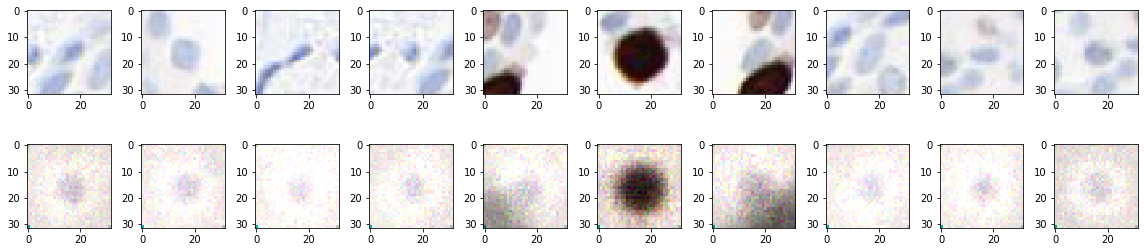

In [11]:
import matplotlib.pyplot as plt
import numpy as np

n_rec = 10

offset = 10
x_batch = X[offset:batch_size+offset]

plt.figure(figsize=(n_rec+6,4))

pred_img = sess.run(x_reco, feed_dict={x: x_batch})
pred_img = pred_img.reshape(batch_size, 32, 32, 3)

for i in range(n_rec):
    
    plt.subplot(2, n_rec, i+1)
    plt.imshow(x_batch[i])

    plt.subplot(2, n_rec, n_rec+i+1)
    plt.imshow(pred_img[i])

plt.tight_layout()